### Homework 8
Ваша задача:

- Task 1. Ідентифікувати та описати проблеми у цій візуалізації даних (я очікую від вас текст)
- Task 2. Зробити альтернативний варіант презентації цих даних (я очікую від вас візуалізацію та пояснення, чому вона працює ліпше, ніж оригінальна)

In [53]:
import altair    as alt
import pandas    as pd
from IPython.display import Image


alt.renderers.enable('default')

RendererRegistry.enable('default')

### Task 1. Проблеми у поточній візуалізації

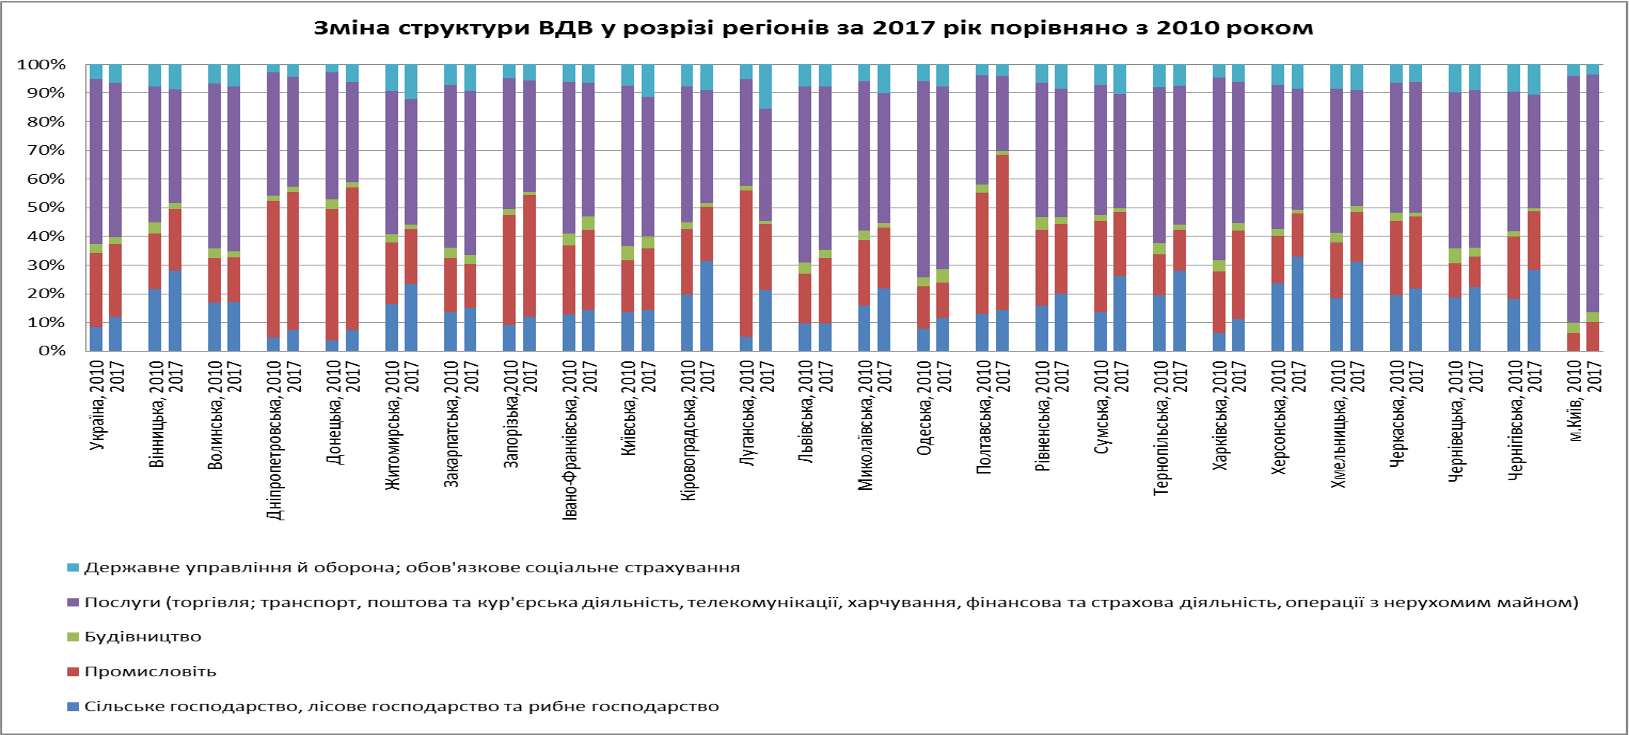

In [54]:
Image("Picture_1.png")

#### Відповідь: на графіку постаралися показати порівняльну характеристку одразу двох параматерів: регіон і структури ВДВ. Через що графік виглядає дуже навантажено і тяжко зрозуміти що все ж таки змінилося. Також тяжко порівнянювати між 2010 і 2017 зміни, адже це stacked bar chart, і порівнювати окремі структури неможливо, адже вони починають не не одній висоті. А що вже говорити ще про порівняння між регіонами. На мою думку, потрібно розбити ці дві сутності. 

### Task 2. Зробити альтернативний варіант презентації цих даних

In [55]:
df = pd.read_excel('1.4_02.xlsx')

In [56]:
df[['Регіон', 'Рік']] = df['Регіон, рік'].str.split(',', 1, expand=True)

In [57]:
df.drop('Регіон, рік', axis=1, inplace=True)

In [58]:
df['Рік'] = pd.to_numeric(df['Рік'], errors='coerce')

In [59]:
df = df.rename(columns = {'сільське господарство': 'Сільське господарство'}, inplace = False)
df = df.rename(columns = {'промисловість': 'Промисловість'}, inplace = False)
df = df.rename(columns = {'будівництво': 'Будівництво'}, inplace = False)
df = df.rename(columns = {'послуги': 'Послуги'}, inplace = False)
df = df.rename(columns = {'державне управління': 'Державне управління'}, inplace = False)

In [60]:
df.head()

,Сільське господарство,Промисловість,Будівництво,Послуги,Державне управління,Регіон,Рік
0,8.3,25.9,3.3,57.3,5.2,Україна,2010
1,12.1,25.2,2.5,53.7,6.5,Україна,2017
2,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
3,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
4,16.9,15.6,3.2,57.7,6.6,Волинська,2010


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Сільське господарство  52 non-null     float64
 1   Промисловість          52 non-null     float64
 2   Будівництво            52 non-null     float64
 3   Послуги                52 non-null     float64
 4   Державне управління    52 non-null     float64
 5   Регіон                 52 non-null     object 
 6   Рік                    52 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


In [62]:
country_list = list(df['Регіон'].unique())
input_dropdown = alt.binding_select(options=country_list)
selection = alt.selection_single(fields=['Регіон'], bind=input_dropdown, name='Region', init={'Регіон': 'Львівська'})

alt.Chart(df).mark_bar(
    cornerRadiusTopLeft  = 3,
    cornerRadiusTopRight = 3
).transform_fold(
    ['Сільське господарство', 'Промисловість', 'Будівництво', 'Послуги', 'Державне управління']
).encode(
    x = alt.X('value:Q', title='Значення'),
    y = alt.Y('Рік:N', title="Рік"),
    color = alt.Color('key:N', title='Складові'),
    tooltip = alt.Tooltip('value:Q'),
    order=alt.Order(
      'key:N',
       sort='ascending'
    )
).add_selection(
    selection
).transform_filter(
    selection
).properties(width = 800, height = 400, title='Зміна структури ВДВ за 2017 рік порівняно з 2010 роком')

alt.Chart(...)

#### Відповідь: на мою думку така візуалізація є кращою, спершу тому що горизонтально порівнювати краще ніж вертикально. По-друге, нас цікавить в першу чергу порівняння між 2017 і 2010 роком, тому вибір регіону виведено в dropdown. Також за допомогою tooltip можна побачити кожне окреме значення, якщо візульно порівняти тяжко. 